In [1]:
#!/usr/bin/env python

In [2]:
import os
import sys
if os.path.exists('/home/chieh/code/wuML'):
	sys.path.insert(0,'/home/chieh/code/wuML')

In [3]:
import wuml 
from wuml import jupyter_print

ist of possible classifiers = <br>
['GP', 'SVM', 'RandomForest', 'KNN', 'NeuralNet', 'LDA', 'NaiveBayes', 'IKDR','LogisticRegression']<br>
['LDA+GP', 'LDA+SVM', 'LDA+RandomForest', 'LDA+KNN', 'LDA+NeuralNet', 'LDA', 'LDA+NaiveBayes', 'LDA+IKDR','LDA+LogisticRegression']

In [4]:
data = wuml.make_classification_data( n_samples=300, n_features=6, n_informative=3, n_classes=3)

In [5]:
jupyter_print('Running a single classifier')
cf = wuml.classification(data, classifier='LogisticRegression')
jupyter_print(cf.result_summary(print_out=False))
jupyter_print(cf.model.coef_)
jupyter_print('\nThe linear weights that designates feature importance')
jupyter_print(cf.output_sorted_feature_importance_table())
jupyter_print('We can save the classifer to file for later use')
cf.save_classifier_to_pickle_file('RL_classifier.pk')

Running a single classifier


,classifier,Train,Test
,LogisticRegression,0.781,0.7


,0,1,2,3,4,5
0,-0.094834,-0.125688,0.427472,0.059491,0.145381,1.092169
1,0.150449,0.051325,1.089906,-0.076671,-0.075364,-0.643219
2,-0.055615,0.074363,-1.517378,0.017180,-0.070017,-0.448950



The linear weights that designates feature importance


,Coefficients
2,0.260000
5,0.214074
1,0.008889
0,0.005185
3,0.003704


None
We can save the classifer to file for later use


In [6]:
jupyter_print('Now we load the classifier and use it')
ikdr = wuml.pickle_load('RL_classifier.pk')
jupyter_print('You can get the labels by passing the data into the class')
ӯ = ikdr(data)
summary = wuml.summarize_classification_result(data.Y, ӯ)

Now we load the classifier and use it
You can get the labels by passing the data into the class
Classification Accuracy: 0.7733


,y,ŷ,Δy
0,1,0,1
1,1,2,1
2,0,0,0
3,0,0,0
4,1,2,1
5,0,0,0
6,0,0,0
7,2,2,0
8,2,2,0
9,0,0,0


In [7]:
jupyter_print('\nSorted Feature Importance')
cf.output_sorted_feature_importance_table(data.columns)
jupyter_print('\nNotice how the feature importances from LR is similar to using permutation_importance from sklearn')


Sorted Feature Importance


,Coefficients
2,0.269630
5,0.220741
1,0.009630
4,0.003704
3,0.002963



Notice how the feature importances from LR is similar to using permutation_importance from sklearn


In [8]:
jupyter_print('\nWe can also reduce the dimension first via LDA')
cf = wuml.classification(data, classifier='LDA+IKDR')#, reduce_dimension_first_method='LDA')
jupyter_print(cf.result_summary(print_out=False))


We can also reduce the dimension first via LDA


,classifier,Train,Test
,LDA+IKDR,0.815,0.667


In [9]:
jupyter_print('\n\nRun all classifiers sorted by Accuracy')
all_classifier = ['GP', 'SVM', 'KNN', 'NeuralNet', 'LDA', 'IKDR','LogisticRegression','LDA+GP', 'LDA+SVM', 'LDA+RandomForest', 'LDA+KNN', 'LDA+NeuralNet', 'LDA+NaiveBayes', 'LDA+IKDR','LDA+LogisticRegression']



Run all classifiers sorted by Accuracy


In [10]:
models = wuml.run_every_classifier(data, y=data.Y, order_by='Test', classifiers=all_classifier)
jupyter_print(models['Train/Test Summary'])

Running GP
Running SVM
Running KNN
Running NeuralNet
Running LDA
Running IKDR
Running LogisticRegression
Running LDA+GP
Running LDA+SVM
Running LDA+RandomForest
Running LDA+KNN
Running LDA+NeuralNet
Running LDA+NaiveBayes
Running LDA+IKDR
Running LDA+LogisticRegression


,classifier,Train,Test
,LDA+SVM,0.796,0.867
,LDA+LogisticRegression,0.759,0.867
,SVM,0.874,0.833
,LDA+GP,0.811,0.833
,LDA+NaiveBayes,0.781,0.833
,LDA,0.774,0.833
,NeuralNet,0.952,0.8
,KNN,0.852,0.8
,LDA+NeuralNet,0.826,0.8
,LDA+IKDR,0.815,0.8




Pick out SVM and plot Feature Importance


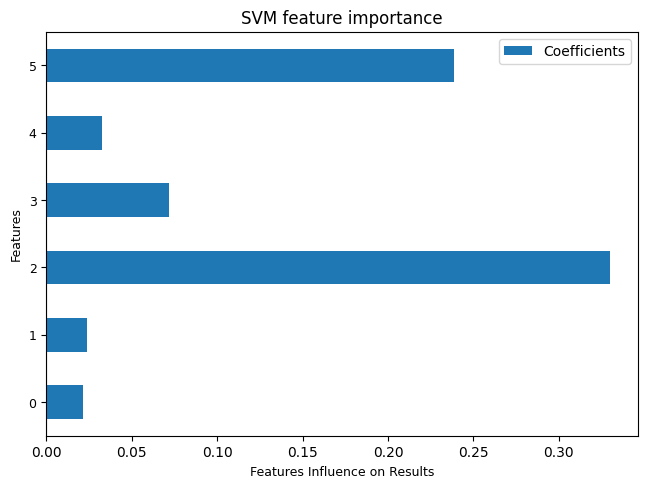

In [11]:
jupyter_print('\n\nPick out SVM and plot Feature Importance')
models['SVM'].plot_feature_importance('SVM feature importance', data.columns)